In [15]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

plt.style.use(['science', 'notebook', 'grid'])

In [16]:
R = 200 + 14.5
L = 46.5*1e-3
C = (3.48 + 3.43)*1e-6

R_err = 0.2
L_err = 0.1*1e-3
C_err = 0.1*1e-9

omega_0 = (L*C)**(-1/2)
omega_0_err = (1/2)*(L*C)**(-3/2) *C*L_err + (1/2)*(L*C)**(-3/2)*L*C_err

gamma = R/L
gamma_err = R_err/L + R/(L**2) * L_err

beta = (-omega_0**2 + gamma**2/4)**(1/2)
beta_err = (1/2) *(-omega_0**2 + gamma**2/4)**(-1/2)*2*omega_0*omega_0_err + (1/2) *(-omega_0**2 + gamma**2/4)**(-1/2)*(1/2)*gamma*gamma_err

print("Valores medidos: ")
print(f"R = {R} +- {R_err}")
print(f"L = {L} +- {L_err}")
print(f"C = {C} +- {C_err}")

print()
print("Valores Calculados: caso supercrítico")

print(f'beta = {beta} +- {beta_err}')
print(f'gamma = {gamma} +- {gamma_err}')


Valores medidos: 
R = 214.5 +- 0.2
L = 0.0465 +- 0.0001
C = 6.91e-06 +- 1.0000000000000002e-10

Valores Calculados: caso supercrítico
beta = 1485.7685835120144 +- 13.305806851070452
gamma = 4612.903225806452 +- 14.22129725979882


In [17]:
df = pd.read_csv('./dados/scope_4_2.csv', sep='\t')

x_data = df['second'].values
y_data = df['Volt'].values
x_data_err = df['unc_seconds'].values
y_data_err = df['unc_Volt'].values


In [18]:
def func(x_data, a,b, gamma, beta):
    return np.exp(-gamma/2 *x_data) *(a*np.exp(-beta * x_data) + b*np.exp(beta * x_data))                                                                            

popt, pcov = curve_fit(func, x_data, y_data, p0 = [1,1, gamma, beta])
a, b, gamma, beta = popt 
a_err,b_err, gamma_err, beta_err = np.sqrt(np.diag(pcov))
r2 = r2_score(y_data, func(x_data, *popt))

x_data_t = np.linspace(min(x_data), max(x_data), 2000)

print("Valores de ajuste")
print(f"gamma = {gamma*1.2} +- {gamma_err*1.2}")
print(f"beta = {beta*2.5} +- {beta_err*2.5}")

Valores de ajuste
gamma = 4597.88129021184 +- 9.408134729810556
beta = 1462.927374346057 +- 20.92194638849767


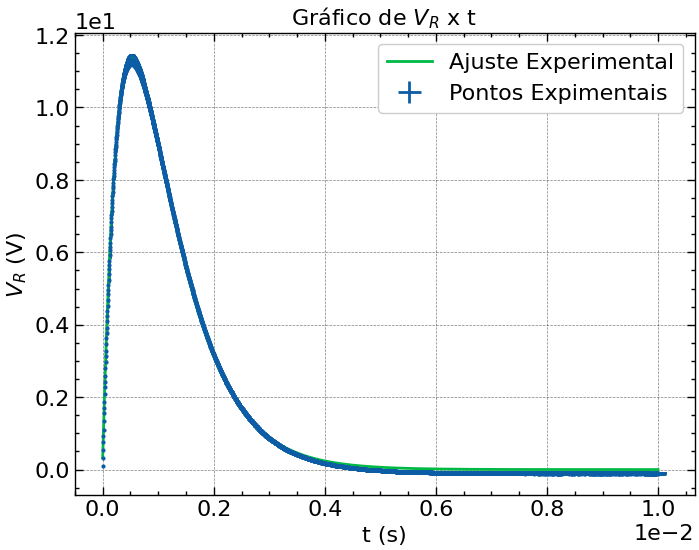

In [19]:
plt.errorbar(x_data, y_data, xerr=x_data_err, yerr= y_data_err, marker = 'o',ms = 2, ls = '', label = 'Pontos Expimentais')
plt.plot(x_data_t, func(x_data_t,*popt),  label = 'Ajuste Experimental') 

plt.xlabel(r"t (s)")
plt.ylabel(r"$V_R$ (V)")

plt.title(r"Gráfico de $V_R$ x t")
plt.title(r"Gráfico de $V_R$ x t")
plt.legend()


plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))